In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
#KNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv')

In [7]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [8]:
#먼저 예측될 포지션이 무엇인가
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

Text(0.5, 1.0, 'STL and 2P in 2d plane')

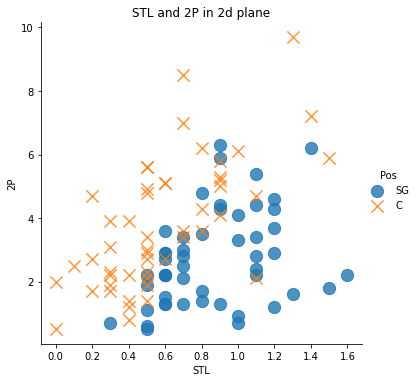

In [22]:
#시각화
#스틸, 2점슛 데이터 시각화
sns.lmplot('STL','2P',data=df,fit_reg=False, #x, y, data, no line
scatter_kws={'s':150}, #점의 크기
markers=['o','x'],
hue='Pos')

#타이틀
plt.title('STL and 2P in 2d plane')

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

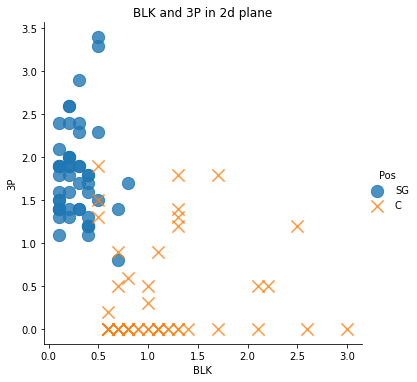

In [24]:
#시각화
#스틸, 2점슛 데이터 시각화
sns.lmplot('BLK','3P',data=df,fit_reg=False, #x, y, data, no line
scatter_kws={'s':150}, #점의 크기
markers=['o','x'],
hue='Pos')

#타이틀
plt.title('BLK and 3P in 2d plane')

In [25]:
# 데이터의 구분이 확실할 경우 선택된 속성들이 머신러닝 정확도에 큰 도움을 줄 수 있을 것임

In [26]:
df.drop(['2P','AST','STL'],axis=1,inplace=True)

In [28]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [33]:
train,test=train_test_split(df,test_size=0.2)

In [39]:
print(train.shape[0])
print(test.shape[0])

80
20


In [46]:
#최적의 K를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터의 절반까지 지정
max_k_range=train.shape[0] // 2
k_list=[]
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_val_scores=[]
x_train=train[['3P','BLK','TRB']]
y_train=train[['Pos']]

#교차검증을 각 k를 대상으로 수행해 검증 결과를 저장 
#cross_val_score를 사용하면 손쉽게 kNN 모델의 교차검증을 수행할 수 있다. 
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,scoring='accuracy')
    cross_val_scores.append(scores.mean())

cross_val_scores

[0.9375,
 0.9,
 0.9,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8375]

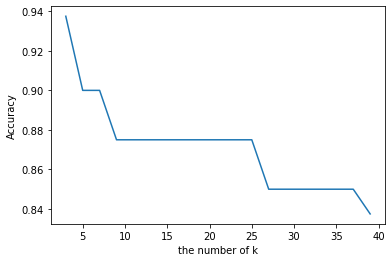

In [45]:
#k에 따른 정확도를 시각화
plt.plot(k_list, cross_val_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [47]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_val_scores.index(max(cross_val_scores))]
print('The best number of k : ' + str(k))

The best number of k : 3


In [49]:
#테스트 진행
#라이브러리 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

#학습에 사용될 속성을 지정
x_train = train[['3P','BLK','TRB']]
#선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

#kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

#테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P','BLK','TRB']]

#선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

#모델 예측 정확도(acc) 출력
print('accuracy : '+ str(accuracy_score(y_test.values.ravel(),pred)))

accuracy : 0.95


In [50]:
# 실제 값과 예측된 값을 직접 비교 
comparision = pd.DataFrame({'prediction':pred, 'ground_truth': y_test.values.ravel()})
comparision

,prediction,ground_truth
0,C,C
1,C,C
2,C,C
3,SG,SG
4,C,C
5,SG,C
6,SG,SG
7,SG,SG
8,SG,SG
9,SG,SG
